## Project #2 - Linear and Multivariable Regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

...

## Tasks

In [1]:
# Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For splitting the data
from sklearn.model_selection import train_test_split

# For modeling
from sklearn.linear_model import LinearRegression

# For evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the data from the excel file
df = pd.read_excel("LogDataProject_Cleaned_OutliersRemoved.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1059 non-null   float64
 1   DEN     1059 non-null   float64
 2   NEU     1059 non-null   float64
 3   Vp      1059 non-null   float64
dtypes: float64(4)
memory usage: 33.2 KB


### Linear Regression

In [3]:
# Define the target and the features
y = df['Vp']

X1 = df[['Vs']]
X2 = df[['DEN']]
X3 = df[['NEU']]

In [4]:
# Split the data, keep 30% for testing
X1_train, X1_test, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3)
X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.3)
X3_train, X3_test, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3)

print ("Training Data", X1_train.shape)
print ("Testing Data", X1_test.shape)
print ("Total Data", df.shape)

Training Data (741, 1)
Testing Data (318, 1)
Total Data (1059, 4)


In [5]:
# Create a Regression object, used to find the optimized coefficients
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()

regressor1.fit(X1_train, y_train1)
regressor2.fit(X2_train, y_train2)
regressor3.fit(X3_train, y_train3)

# Predict the values using the optimized coefficients
y_pred1 = regressor1.predict(X1_test)
y_pred2 = regressor2.predict(X2_test)
y_pred3 = regressor3.predict(X3_test)


#### Model Evatual 

In [6]:
# Vs

# Calculate the mean squared error
mse = mean_squared_error(y_test1, y_pred1) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

# Calculate the r-squared
r2 = r2_score(y_test1, y_pred1)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.029930145862760667
Root Mean Squared Error: 0.17300331171038508
R-Square: 0.7717205501716091


In [8]:
# DEN

# Calculate the mean squared error
mse = mean_squared_error(y_test2, y_pred2) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))

# Calculate the r-squared
r2 = r2_score(y_test2, y_pred2)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.047543058690711786
Root Mean Squared Error: 0.21804370821170646
R-Square: 0.6450911200857667


In [9]:
# NEU

# Calculate the mean squared error
mse = mean_squared_error(y_test3, y_pred3) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test3, y_pred3))

# Calculate the r-squared
r2 = r2_score(y_test3, y_pred3)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

Mean Squared Error: 0.030789714188264632
Root Mean Squared Error: 0.17546998087497653
R-Square: 0.7793304044731137


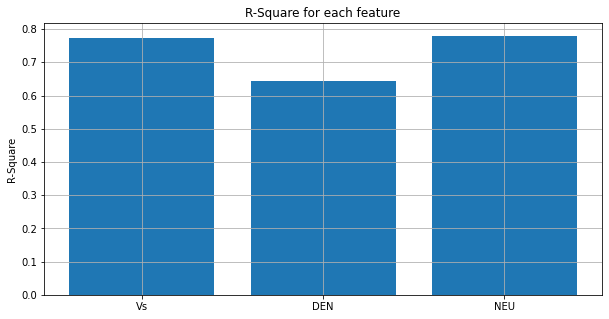

In [60]:
plt.figure(figsize=(10,5))
plt.bar(['Vs','DEN','NEU'],[r2_score(y_test1, y_pred1),r2_score(y_test2, y_pred2),r2_score(y_test3, y_pred3)])
plt.ylabel('R-Square')
plt.title('R-Square for each feature')
plt.grid()
plt.show()

**Comment**
From the bar plot we can see that NEU has the highest R2 score, this means that the model using NEU is the most accurate model.
When calculating the Uniaxial Compressive Strength in the next task, this model will be used.

#### Calculating Uniaxial Compressive Strenght With The Best Model

In [11]:
# Formula for computing the Uniaxial Compressive Strength (Co)
def compute_C0(Vp):
    return 0.77 * Vp**2.92

In [12]:
# My model is: Vp = 4.94 - 5.24 * NEU
def compute_Vp_using_NEU(NEU):
    return regressor3.intercept_ + regressor3.coef_ * NEU

In [13]:
C0_true = compute_C0(df[['Vp']])
C0_pred = compute_C0(compute_Vp_using_NEU(df[['NEU']]))

# Calculate the R2
r2 = r2_score(C0_true, C0_pred)
print('R-Square:', r2)

R-Square: 0.7590111971134101


**Comment:**
The R2 score for our model is 0.76, this is means that the model captures 76% of the variance in the data, this is a substantial level of predictive capability.

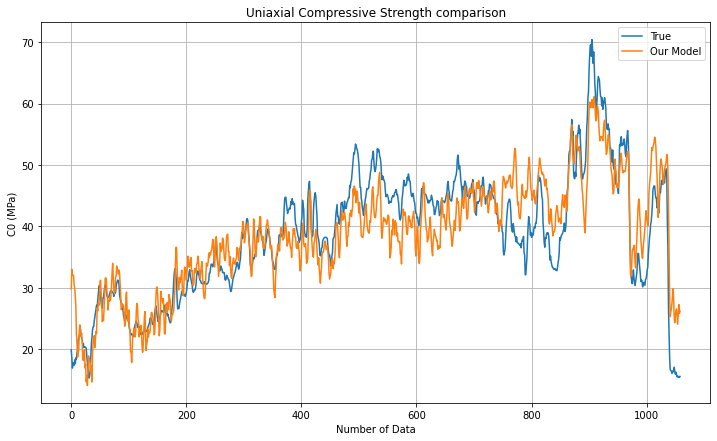

In [59]:
plt.figure(figsize=(12,7))
plt.plot(C0_true)
plt.plot(C0_pred)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['True','Our Model'])
plt.grid()
plt.show()

#### Comparing My Model using (Vs) against Castagna [1]

In [15]:
# Castanga model used in the gulf of Mexico [1]
def castagna(Vs):
    return 1.16 * Vs + 1.36

In [16]:
# My model based on data from the north sea: Vp = 0.57 + 1.59 * Vs
def compute_Vp_using_Vs(Vs):
    return regressor1.intercept_ + regressor1.coef_ * Vs

In [54]:
C0_castagna = compute_C0(castagna(df[['Vs']]))
C0_mymodel = compute_C0(compute_Vp_using_Vs(df[['Vs']]))

# Calculate the R2
r2_castagna = r2_score(C0_true, C0_castagna)
r2_mymodel = r2_score(C0_true, C0_mymodel)

print('R-Square for Castagna:',r2_castagna )
print('R-Square for Our Model:',r2_mymodel )


R-Square for Castagna: 0.5605831033070513
R-Square for Our Model: 0.7248300217740842


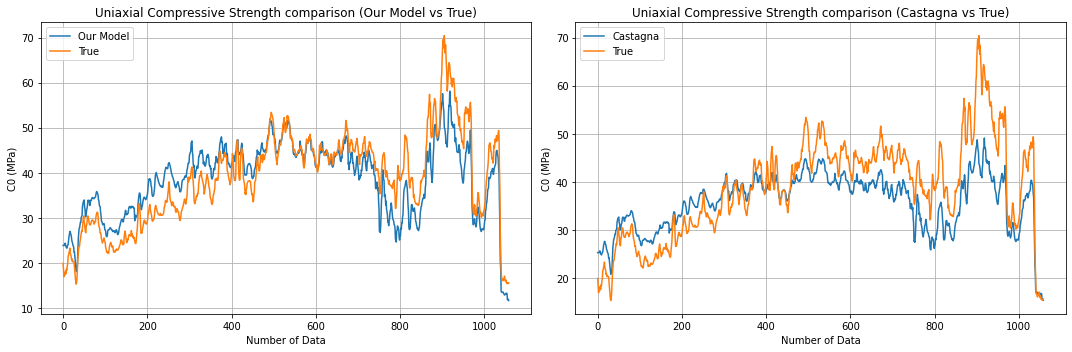

In [67]:
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15,5)) 
# Plotting the first set of data (C0_mymodel and C0_true)
axes[0].plot(C0_mymodel, label='Our Model')
axes[0].plot(C0_true, label='True')
axes[0].set_xlabel("Number of Data")
axes[0].set_ylabel("C0 (MPa)")
axes[0].set_title("Uniaxial Compressive Strength comparison (Our Model vs True)")
axes[0].legend()
axes[0].grid()

# Plotting the second set of data (C0_castagna and C0_true)
axes[1].plot(C0_castagna, label='Castagna')
axes[1].plot(C0_true, label='True')
axes[1].set_xlabel("Number of Data")
axes[1].set_ylabel("C0 (MPa)")
axes[1].set_title("Uniaxial Compressive Strength comparison (Castagna vs True)")
axes[1].legend()
axes[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Comment:**

From the R2 results, it is clear that our model based on data from the North Sea, R2 score: 0.72, outperforms the Castagna model, R2 score: 0.56. From the comparison plots, it is shown that our model overlaps more with the true data than the Castagna model.

This is most likely due to the fact that our model is based on data from the North Sea, while Castagna is made for the Gulf of Mexico. Since the data we are comparing against is from the North Sea, it makes sence that our model outperformes the Castagna model.

### Multivariable Regression

In [26]:
# Features and target variable selection
X = df[['Vs', 'DEN', 'NEU']]
y = df['Vp']

In [27]:
# Split data and keep 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print ("Training Data", X_train.shape)
print ("Testing Data", X_test.shape)
print ("Total Data", df.shape)

Training Data (741, 3)
Testing Data (318, 3)
Total Data (1059, 4)


In [28]:
# Create a Regression object, used to find the optimized coefficients
regressor = LinearRegression()

regressor.fit(X_train, y_train)

# Predict the values using the optimized coefficients
y_pred = regressor.predict(X_test)

#### Model Evaluation

In [30]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred) 

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the r-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Square:', r2 )

Mean Squared Error: 0.0060043781767504635
Root Mean Squared Error: 0.07748792277994335
R-Square: 0.9541058082872499


**Comment:**
For the multivariable model the R2 is 0.95 which is quite impressive. 

#### Calculating Uniaxial Compressive Strength With Multi Variable Model

In [38]:
#Vp = - 1.03 + 1.09 * Vs + 1.19 * DEN - 1.13 * NEU
def compute_Vp(Vs, DEN, NEU):
    return regressor.intercept_ + regressor.coef_[0] * Vs + regressor.coef_[1] * DEN + regressor.coef_[2] * NEU

In [39]:
C0_multi_variable = compute_C0(compute_Vp(np.array(df[['Vs']]), np.array(df[['DEN']]), np.array(df[['NEU']])))
C0_true = compute_C0(df[['Vp']])

# Calculate the R2
r2 = r2_score(C0_true, C0_multi_variable)
print('R-Square:', r2)

R-Square: 0.9521517682127586


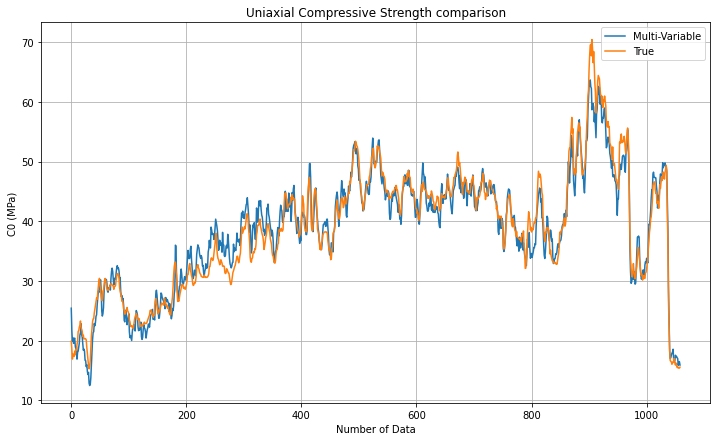

In [58]:
# Plot
plt.figure(figsize=(12,7))
plt.plot(C0_multi_variable)
plt.plot(C0_true)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['Multi-Variable','True'])
plt.grid()
plt.show()

...

## Discussion and conclusion

## Reflections

...

## References
[1]: Castagna, J.P., Batzle, M.L., and Eastwood, R.L., 1985, Relationships between compressional-wave and shear-wave velocitites in clastic silicate rocks: Geophysics, 50, 571-581


...